In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import keras

from keras import models
from keras import optimizers
from keras.layers import Dense
from keras.datasets import imdb
from keras.metrics import Precision, Recall

print("Keras: ", keras.__version__)
print("TF: ", tf.__version__)

Keras:  2.10.0
TF:  2.10.1


# Classifying movie reviews (IMDB)


The IMDB dataset is a well-known benchmark dataset in the field of natural language processing, and is commonly used for sentiment analysis and other text classification tasks. It consists of a large collection of movie reviews, along with their corresponding binary sentiment labels (positive or negative).

The dataset is split into a training set and a test set, with 25,000 reviews in each set. The training set is used to train a machine learning model, while the test set is used to evaluate its performance on unseen data.

One of the key challenges in working with the IMDB dataset is dealing with the large amount of noisy and unstructured text data. This requires careful preprocessing and feature engineering to extract meaningful features from the text.

Once the data has been preprocessed and features have been extracted, a variety of machine learning algorithms can be applied to the dataset, including logistic regression, support vector machines, and neural networks. The performance of these algorithms on the IMDB dataset can be compared using a variety of metrics, such as accuracy, precision, recall, and F1 score. It is common practice to tune hyperparameters and try different feature engineering methods to obtain the best possible performance on the test set.

## The IMDB dataset

In [2]:
input_size = 30000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=input_size)

In [3]:
X_train.shape

(25000,)

In [4]:
y_train.shape

(25000,)

## Max Sequences in dataset

In [5]:
max([max(sequence) for sequence in X_train])

29999

## Vectorize Sequences 

In [6]:
def vectorize_sequences(seq, input_size):
    vectorize_seq = np.zeros((len(seq), input_size))
    for idx, token in enumerate(seq):
        vectorize_seq[idx, token] = 1.
    return vectorize_seq


X_train = vectorize_sequences(X_train, input_size)
y_train = np.asarray(y_train).astype('float32')
X_test = vectorize_sequences(X_test, input_size)
y_test = np.asarray(y_test).astype('float32')

## Multilayer Perceptron Model

Multilayer Perceptron (MLP) is a type of artificial neural network that is commonly used in the field of machine learning. It is a feedforward network, which means that the data flows through the network in only one direction, from the input layer through one or more hidden layers to the output layer.

The MLP is made up of multiple layers of interconnected nodes, or neurons, each of which processes a subset of the input data. The neurons in the input layer receive the raw data and pass it on to the neurons in the first hidden layer, which process the data and pass it on to the next layer, and so on, until the output layer is reached.

The MLP is a powerful tool for solving complex problems that require non-linear relationships between inputs and outputs. It has been used in a wide range of applications, including image recognition, natural language processing, and financial forecasting.

One of the key advantages of the MLP is its ability to learn from data, which makes it a popular choice for supervised learning tasks. During the training process, the network is presented with a set of inputs and the corresponding outputs, and it adjusts its weights and biases to minimize the difference between its predicted outputs and the actual outputs. This process is repeated multiple times until the network is able to accurately predict the outputs for new inputs.

Overall, the multilayer perceptron is a powerful and versatile tool in the field of machine learning, with many applications in both industry and academia. Its ability to learn from data and handle non-linear relationships makes it an essential component of the data scientist's toolkit.

In [7]:
def multilayer_model(input_size):
    model = models.Sequential()
    model.add(Dense(16, activation='relu', input_shape=(input_size,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
    return model

In [8]:
model = multilayer_model(input_size)

## Fit neural network

Training a neural network is a crucial step in building a successful machine learning model. The process involves feeding the network with input data and training it to make accurate predictions on new, unseen data.

One of the key aspects of training a neural network is selecting appropriate hyperparameters, such as the learning rate, number of hidden layers, and batch size. The batch size refers to the number of training examples used in each iteration of the optimization algorithm during training. Choosing the right batch size can have a significant impact on the performance of the network. A larger batch size can lead to faster convergence and better generalization, while a smaller batch size can lead to more accurate gradient estimates and better optimization.

In addition to batch size, the early stopping technique can also be used to improve the training of neural networks. Early stopping is a form of regularization that involves monitoring the validation loss during training and stopping the training process when the validation loss starts to increase, indicating that the model is starting to overfit the training data. The Keras library provides a convenient way to implement early stopping in neural network training. By using the EarlyStopping callback function in Keras, the training process can be stopped automatically when the validation loss stops improving.



In [9]:
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=4, verbose=1)
history = model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1,
                    callbacks=[early_stopping])

Epoch 1/20
391/391 [==============================] - 5s 8ms/step - loss: 0.3277 - accuracy: 0.8669 - precision: 0.8556 - recall: 0.8829
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1811 - accuracy: 0.9322 - precision: 0.9309 - recall: 0.9337
Epoch 3/20
391/391 [==============================] - 3s 9ms/step - loss: 0.1332 - accuracy: 0.9514 - precision: 0.9521 - recall: 0.9507
Epoch 4/20
391/391 [==============================] - 4s 9ms/step - loss: 0.1044 - accuracy: 0.9623 - precision: 0.9636 - recall: 0.9609
Epoch 5/20
391/391 [==============================] - 3s 9ms/step - loss: 0.0817 - accuracy: 0.9711 - precision: 0.9723 - recall: 0.9698
Epoch 6/20
391/391 [==============================] - 4s 9ms/step - loss: 0.0635 - accuracy: 0.9782 - precision: 0.9799 - recall: 0.9766
Epoch 7/20
391/391 [==============================] - 3s 9ms/step - loss: 0.0500 - accuracy: 0.9837 - precision: 0.9845 - recall: 0.9829
Epoch 8/20
391/391 [=====================

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall'])

In [13]:
acc = history.history['accuracy']
loss = history.history['loss']
precision = history.history['precision']
recall = history.history['recall']

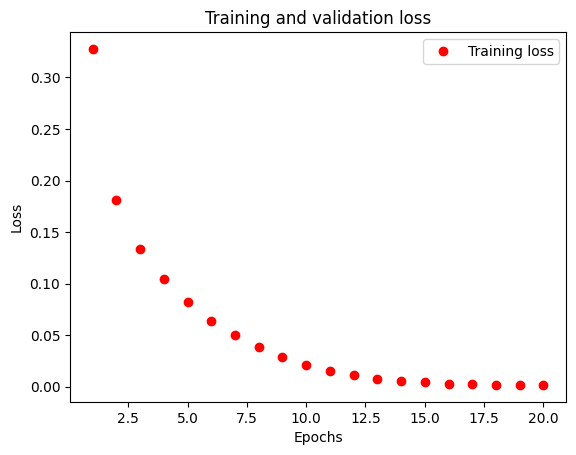

In [16]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

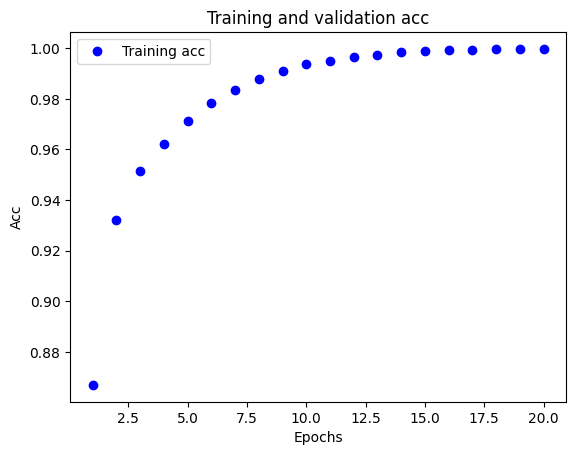

In [17]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

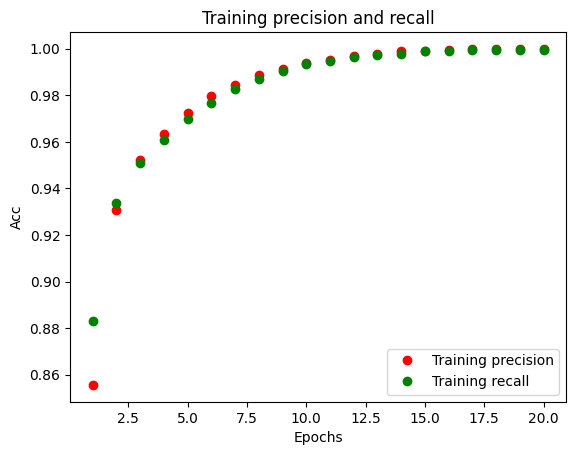

In [18]:
plt.plot(epochs, precision, 'ro', label='Training precision')
plt.plot(epochs, recall, 'go', label='Training recall')
plt.title('Training precision and recall')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

## Using a trained network to generate inference

In [19]:
model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


array([[6.9438149e-03],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [1.1377033e-05],
       [1.5653252e-07],
       [9.6635383e-01]], dtype=float32)